In [1]:
%matplotlib inline

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
np.random.seed(10)

In [4]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

In [5]:
print('train', x_train_image.shape, y_train_label.shape)
print('test', x_test_image.shape, y_test_label.shape)

train (50000, 32, 32, 3) (50000, 1)
test (10000, 32, 32, 3) (10000, 1)


In [6]:
x_train_image_normalize = x_train_image.astype('float32') / 255
x_test_image_normalize = x_test_image.astype('float32') / 255

In [7]:
y_train_label_one_hot = np_utils.to_categorical(y_train_label)
y_test_label_one_hot = np_utils.to_categorical(y_test_label)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Dense(1024, activation='relu'))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
train_history = model.fit(x=x_train_image_normalize, y=y_train_label_one_hot, validation_split=0.2, epochs=20, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 142s - loss: 1.5039 - acc: 0.4584 - val_loss: 1.2766 - val_acc: 0.5824
Epoch 2/20
 - 133s - loss: 1.1391 - acc: 0.5957 - val_loss: 1.1209 - val_acc: 0.6308
Epoch 3/20
 - 138s - loss: 0.9840 - acc: 0.6535 - val_loss: 1.0111 - val_acc: 0.6673
Epoch 4/20
 - 141s - loss: 0.8791 - acc: 0.6908 - val_loss: 0.9603 - val_acc: 0.6885
Epoch 5/20
 - 128s - loss: 0.7915 - acc: 0.7210 - val_loss: 0.8963 - val_acc: 0.7017
Epoch 6/20
 - 130s - loss: 0.7075 - acc: 0.7515 - val_loss: 0.8575 - val_acc: 0.7129
Epoch 7/20
 - 133s - loss: 0.6218 - acc: 0.7823 - val_loss: 0.8110 - val_acc: 0.7333
Epoch 8/20
 - 137s - loss: 0.5583 - acc: 0.8048 - val_loss: 0.7856 - val_acc: 0.7324
Epoch 9/20
 - 125s - loss: 0.4820 - acc: 0.8316 - val_loss: 0.8097 - val_acc: 0.7197
Epoch 10/20
 - 126s - loss: 0.4316 - acc: 0.8482 - val_loss: 0.7804 - val_acc: 0.7319
Epoch 11/20
 - 132s - loss: 0.3752 - acc: 0.8700 - 

In [23]:
def show_train_history(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc="upper left")
    plt.show()

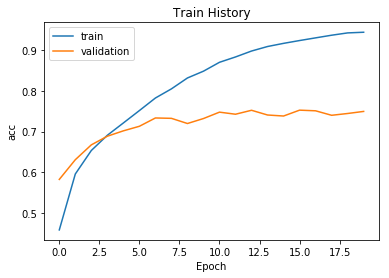

In [24]:
show_train_history('acc', 'val_acc')

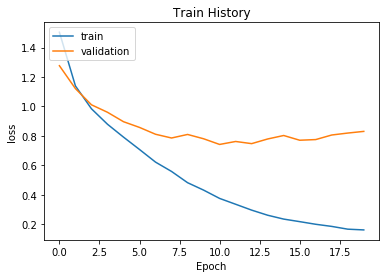

In [25]:
show_train_history('loss', 'val_loss')

In [26]:
scores = model.evaluate(x_test_image_normalize, y_test_label_one_hot, verbose=0)
scores[1]

0.7435

In [27]:
prediction = model.predict_classes(x_test_image_normalize)

In [28]:
prediction[:10]

array([5, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [29]:
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

In [30]:
def plot_images_labels_prediction(images, labels, prediction_p, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
        
        title = str(i) + ', ' + label_dict[labels[i][0]]
        if len(prediction_p) > 0:
            title += ' => ' + label_dict[prediction_p[i]]
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

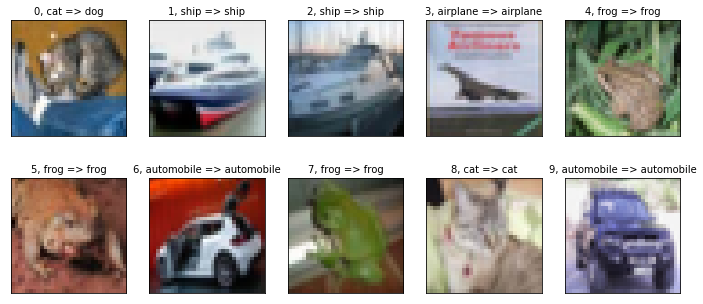

In [31]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, 0)

In [32]:
predicted_probability = model.predict(x_test_image_normalize)

In [33]:
def show_predicted_probability(y, prediction_p, x_img, predicted_probability_p, i):
    print('label:', label_dict[y[i][0]], 'predict', label_dict[prediction_p[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + 'Probability:%1.9f' % (predicted_probability_p[i][j]))

label: cat predict dog


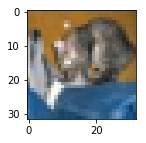

airplaneProbability:0.001177214
automobileProbability:0.000459168
birdProbability:0.002968714
catProbability:0.339684159
deerProbability:0.000380349
dogProbability:0.621503234
frogProbability:0.001088514
horseProbability:0.020971363
shipProbability:0.010734762
truckProbability:0.001032486


In [34]:
show_predicted_probability(y_test_label, prediction, x_test_image, predicted_probability, 0)

label: airplane predict airplane


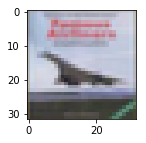

airplaneProbability:0.675666451
automobileProbability:0.000925346
birdProbability:0.001454888
catProbability:0.000028121
deerProbability:0.001944184
dogProbability:0.000000375
frogProbability:0.000000962
horseProbability:0.000005113
shipProbability:0.319836974
truckProbability:0.000137537


In [35]:
show_predicted_probability(y_test_label, prediction, x_test_image, predicted_probability, 3)

In [36]:
prediction.shape

(10000,)

In [37]:
y_test_label.shape

(10000, 1)

In [38]:
y_test_label.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [39]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [40]:
pd.crosstab(y_test_label.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,747,16,38,21,25,3,6,8,103,33
1,13,855,7,21,1,5,8,2,24,64
2,54,4,634,61,98,48,53,24,15,9
3,18,11,70,600,69,124,54,26,17,11
4,10,1,53,58,760,14,38,52,11,3
5,9,5,50,216,63,571,30,35,11,10
6,5,6,40,64,41,16,814,4,7,3
7,10,1,26,44,64,46,3,788,9,9
8,24,23,10,17,12,5,8,1,884,16
